In [ ]:
!pip install -q kaggle
!pip install -q sweetviz
!pip install -q numpy==1.23.5 scipy==1.9.3
!pip install -q autoviml

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from autoviml.Auto_ViML import Auto_ViML

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 57.8MB/s]


In [5]:
!unzip student-performance-factors.zip
!rm -rf student-performance-factors.zip

Archive:  student-performance-factors.zip
  inflating: StudentPerformanceFactors.csv  


In [6]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [8]:
print(df.describe())

       Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count       6,607.00    6,607.00     6,607.00         6,607.00   
mean           19.98       79.98         7.03            75.07   
std             5.99       11.55         1.47            14.40   
min             1.00       60.00         4.00            50.00   
25%            16.00       70.00         6.00            63.00   
50%            20.00       80.00         7.00            75.00   
75%            24.00       90.00         8.00            88.00   
max            44.00      100.00        10.00           100.00   

       Tutoring_Sessions  Physical_Activity  Exam_Score  
count           6,607.00           6,607.00    6,607.00  
mean                1.49               2.97       67.24  
std                 1.23               1.03        3.89  
min                 0.00               0.00       55.00  
25%                 1.00               2.00       65.00  
50%                 1.00               3.00       67.00  

In [9]:
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('Exam_Score')

for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Parental_Involvement: ['Low' 'Medium' 'High']
Unique values in Access_to_Resources: ['High' 'Medium' 'Low']
Unique values in Extracurricular_Activities: ['No' 'Yes']
Unique values in Motivation_Level: ['Low' 'Medium' 'High']
Unique values in Internet_Access: ['Yes' 'No']
Unique values in Family_Income: ['Low' 'Medium' 'High']
Unique values in Teacher_Quality: ['Medium' 'High' 'Low' nan]
Unique values in School_Type: ['Public' 'Private']
Unique values in Peer_Influence: ['Positive' 'Negative' 'Neutral']
Unique values in Learning_Disabilities: ['No' 'Yes']
Unique values in Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Unique values in Distance_from_Home: ['Near' 'Moderate' 'Far' nan]
Unique values in Gender: ['Male' 'Female']


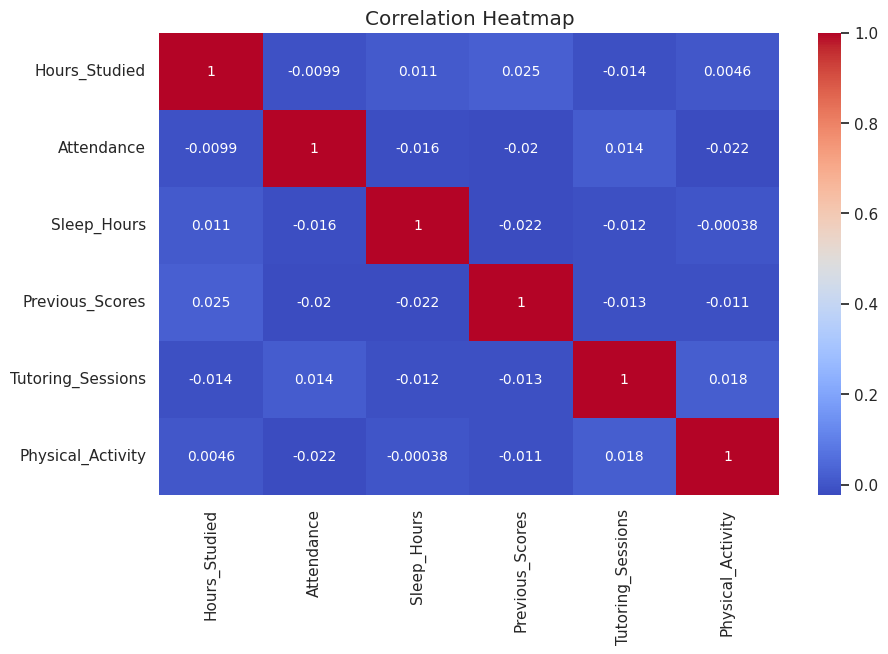

In [11]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

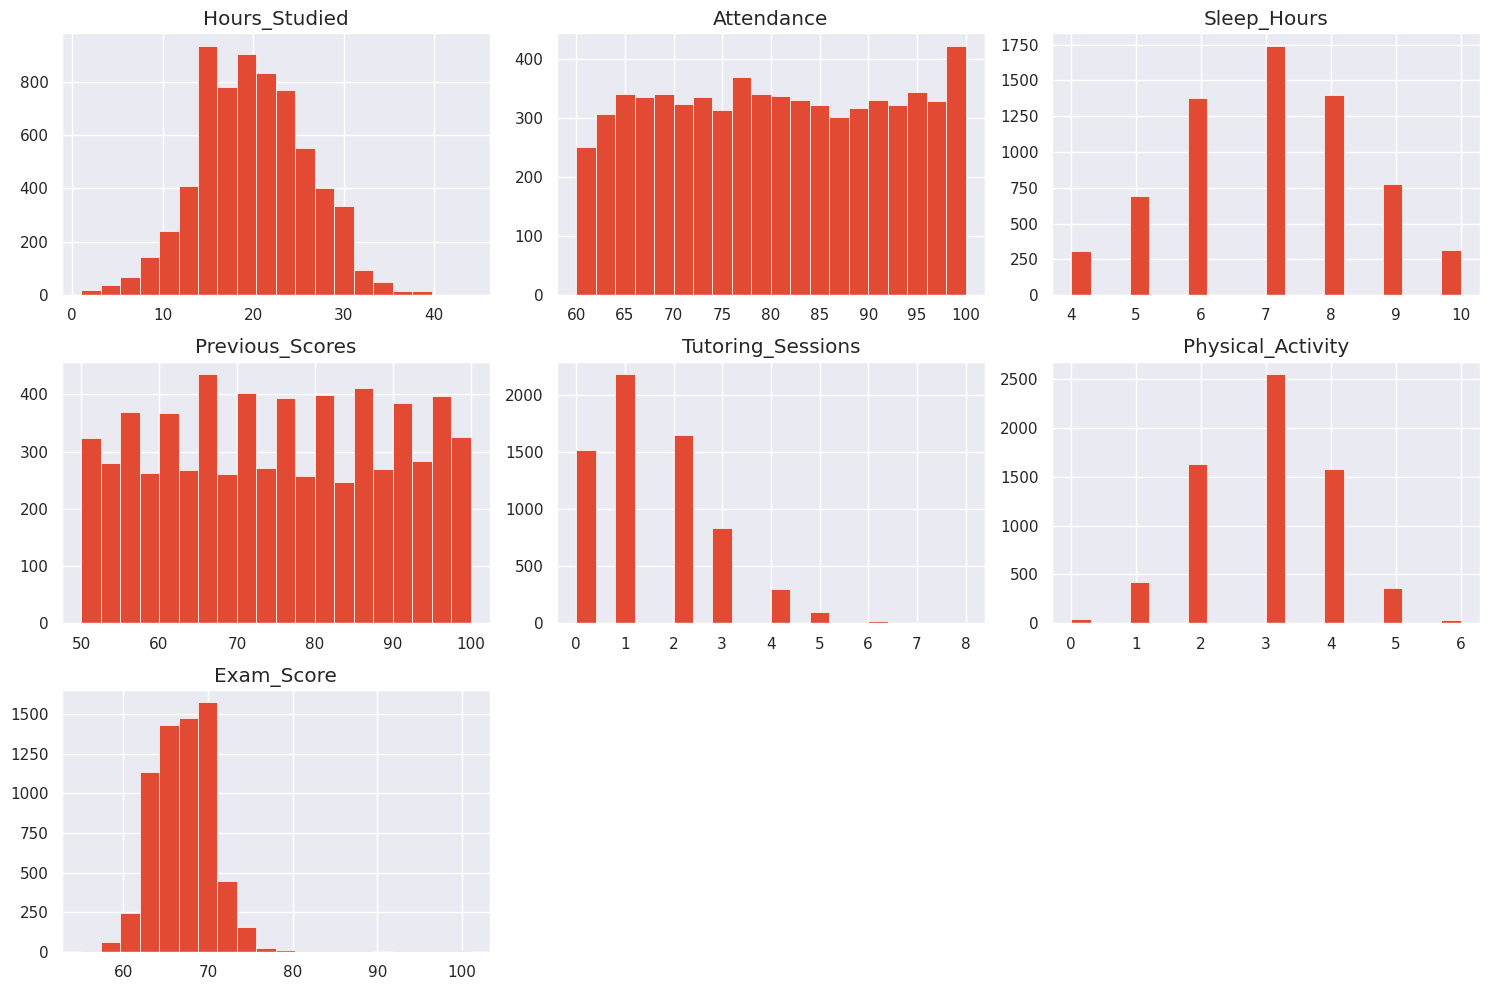

In [12]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

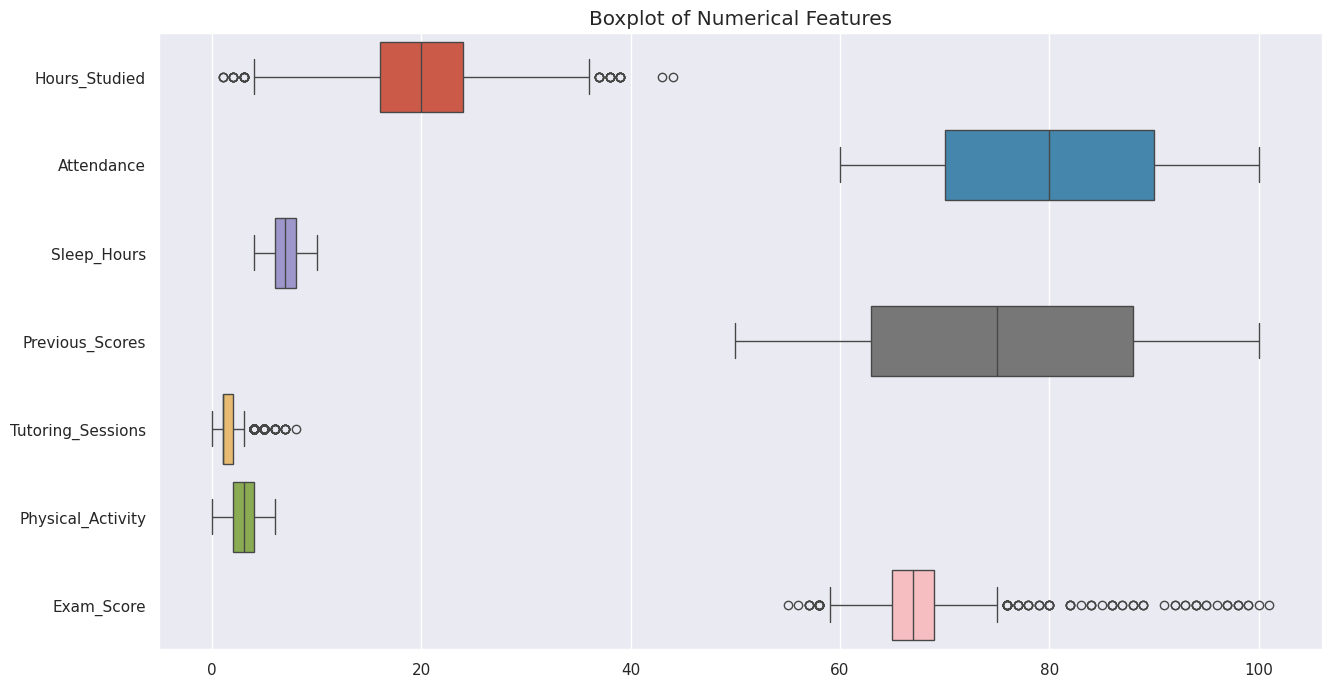

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

In [14]:
df_numerical = df.select_dtypes(include=['number'])
correlation_with_target = df_numerical.corr()['Exam_Score'].sort_values(ascending=False)
print(correlation_with_target)

Exam_Score           1.00
Attendance           0.58
Hours_Studied        0.45
Previous_Scores      0.18
Tutoring_Sessions    0.16
Physical_Activity    0.03
Sleep_Hours         -0.02
Name: Exam_Score, dtype: float64


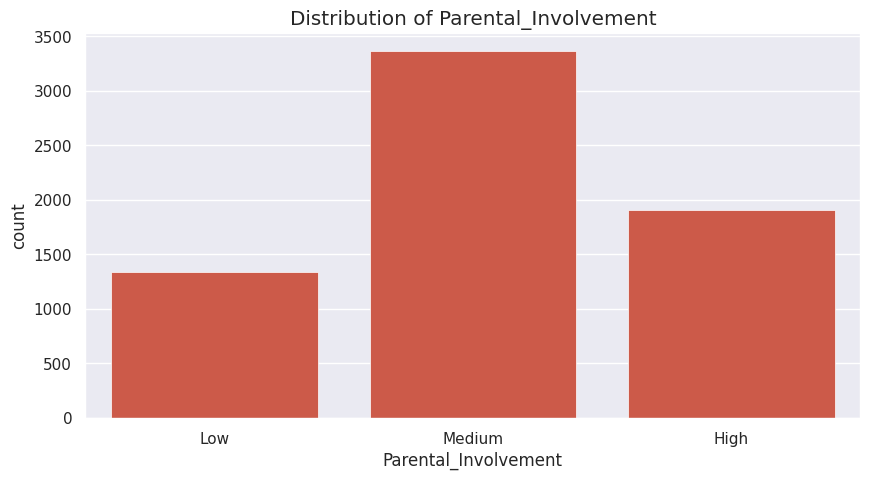

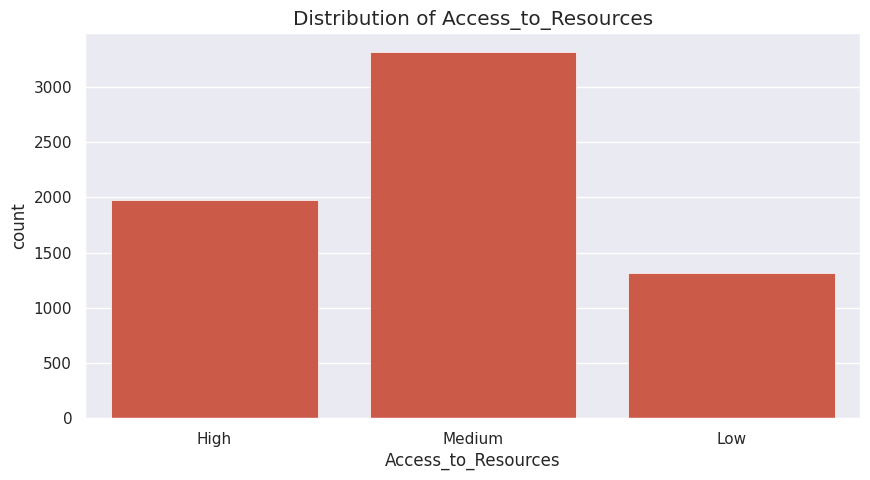

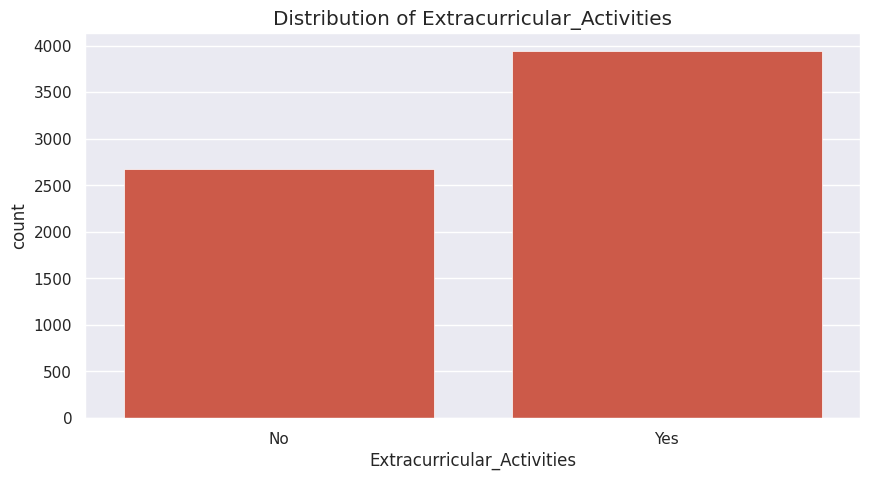

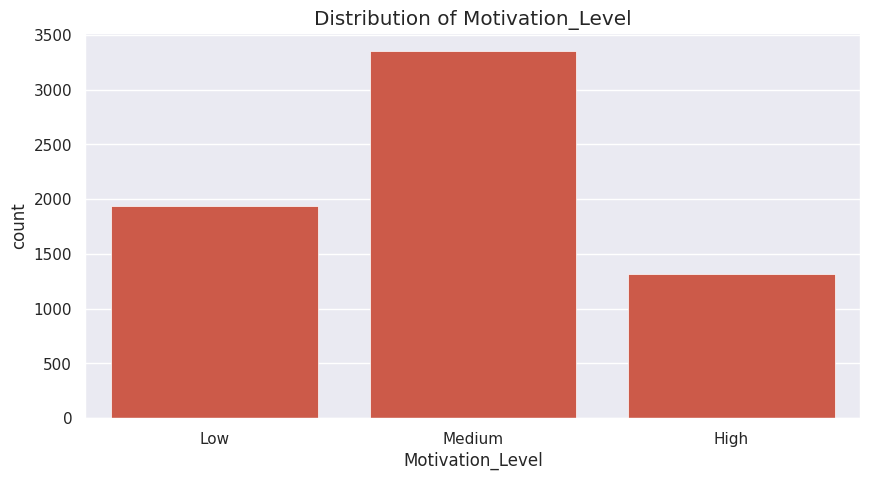

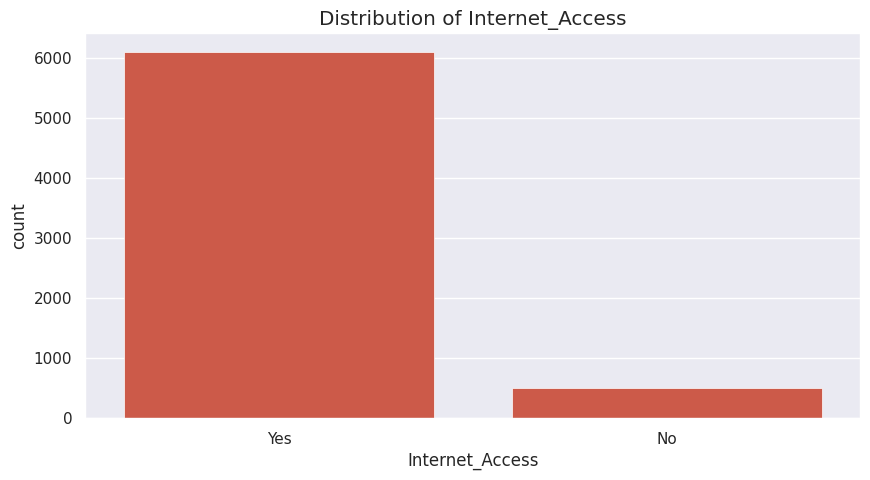

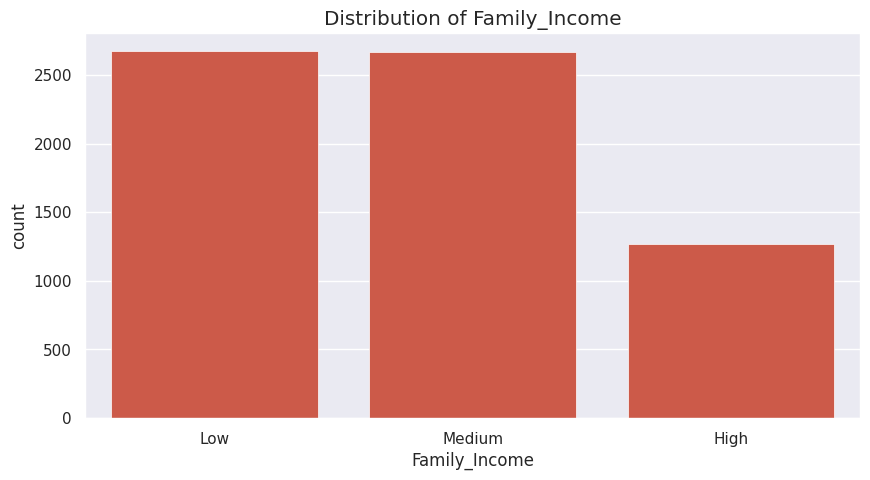

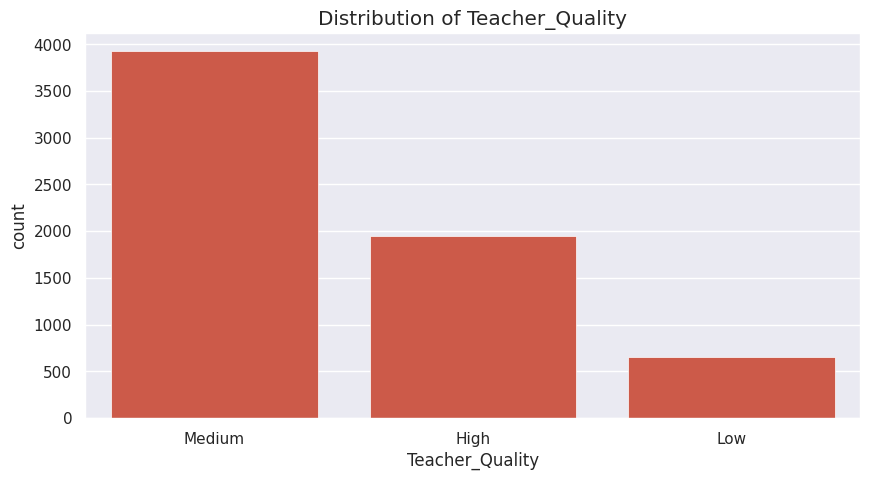

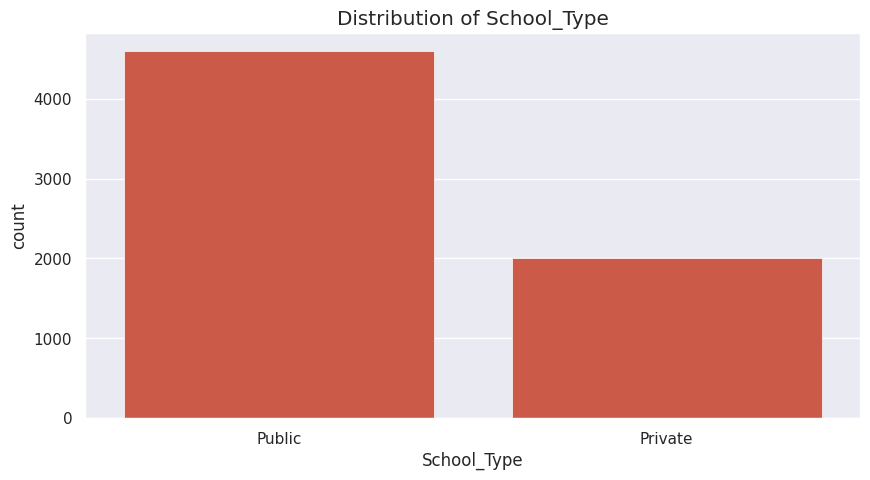

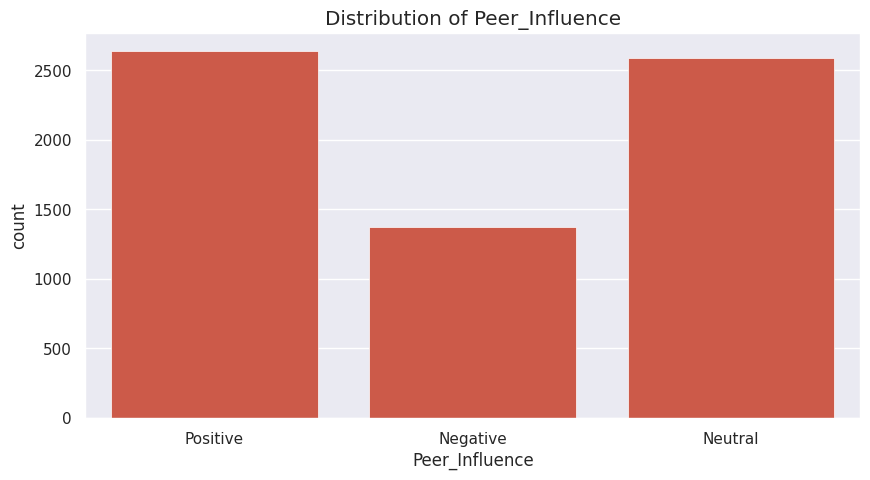

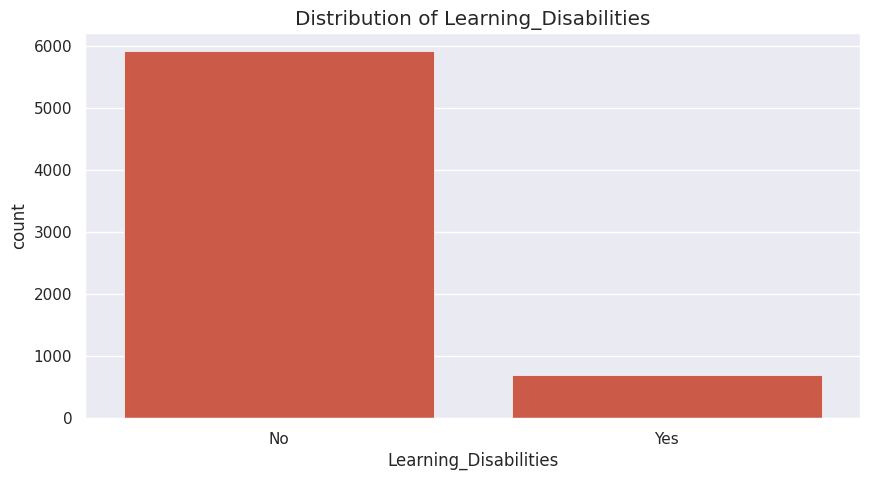

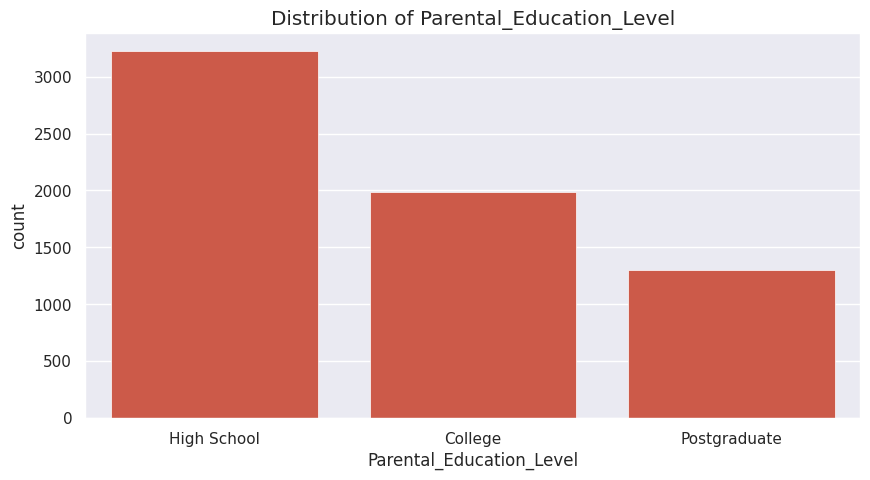

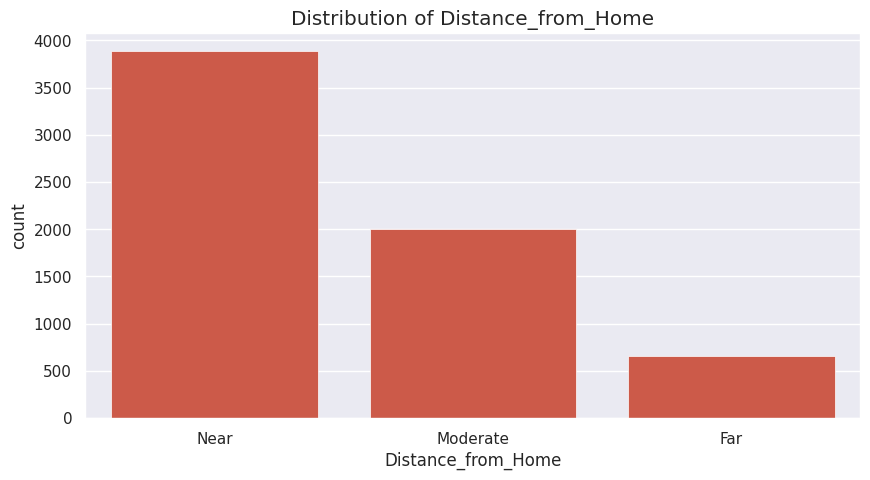

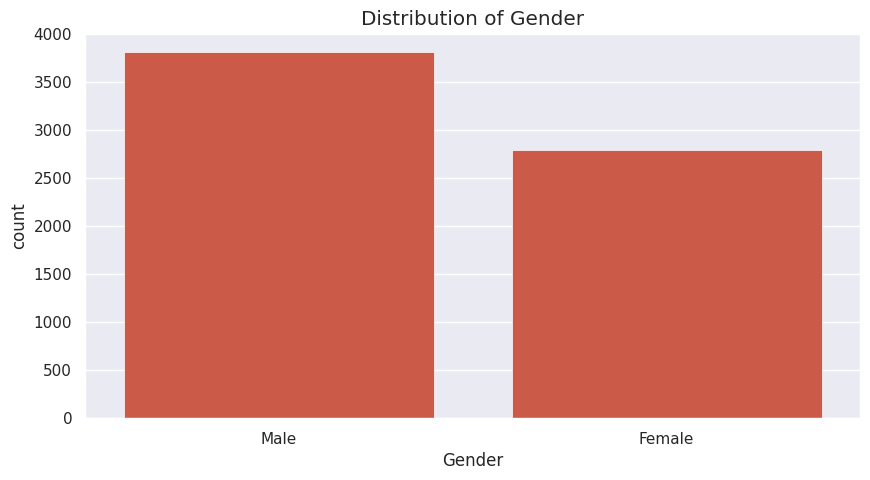

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

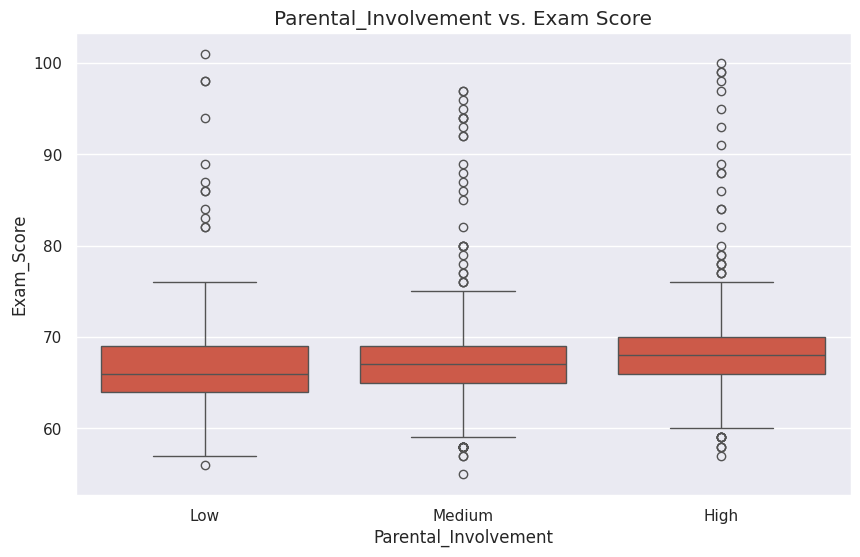

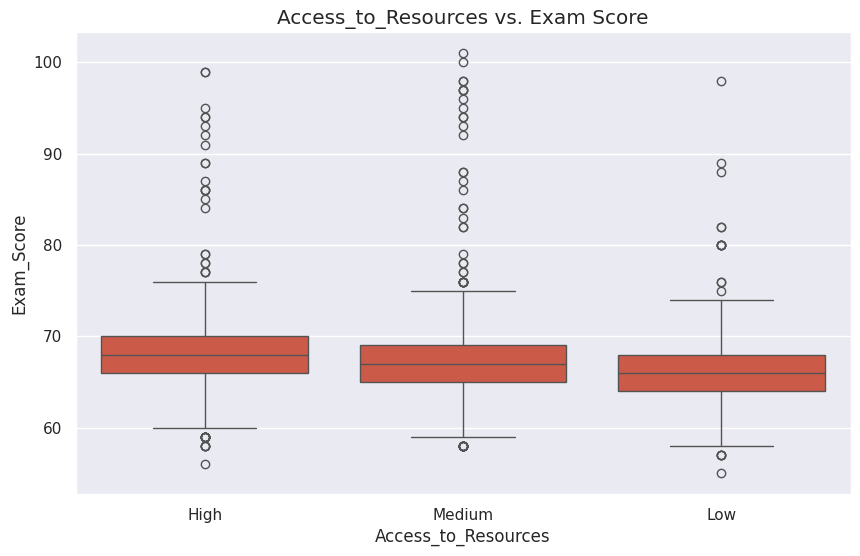

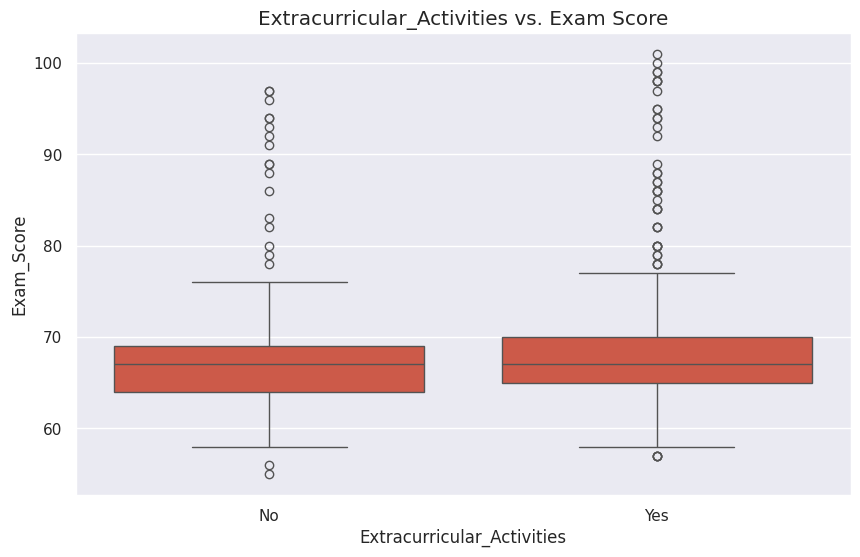

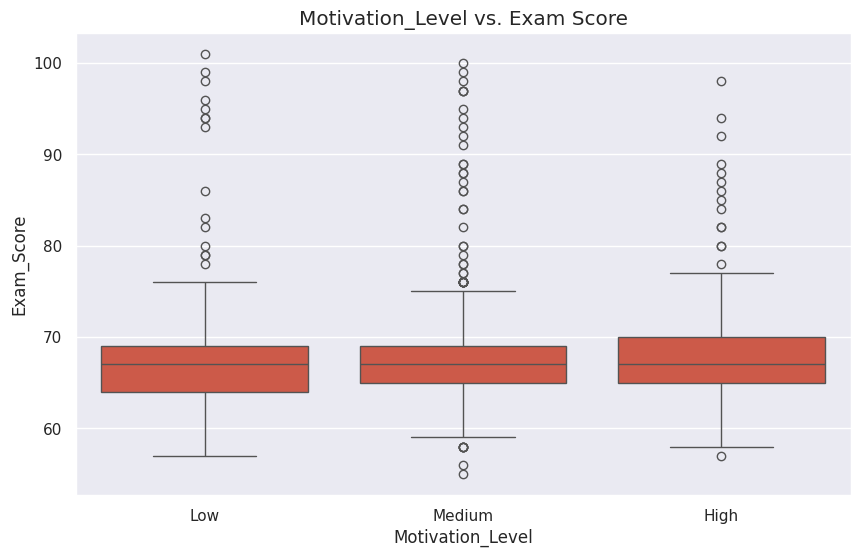

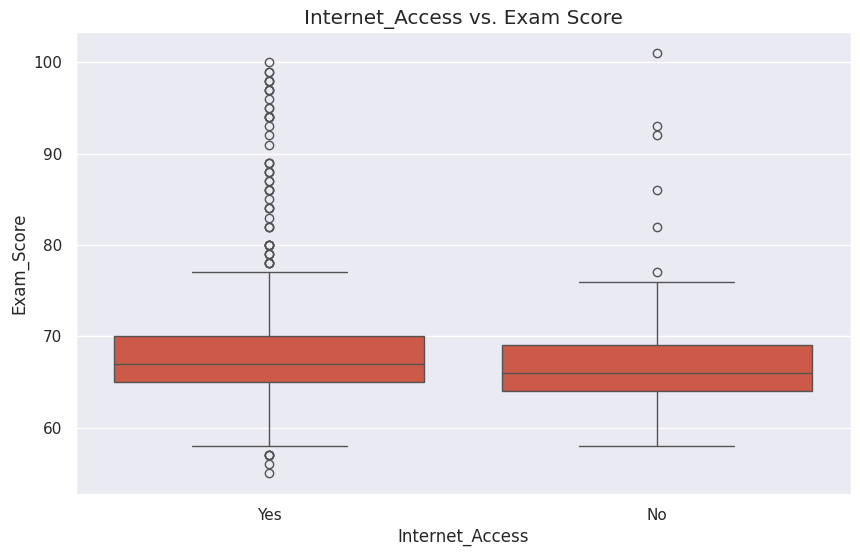

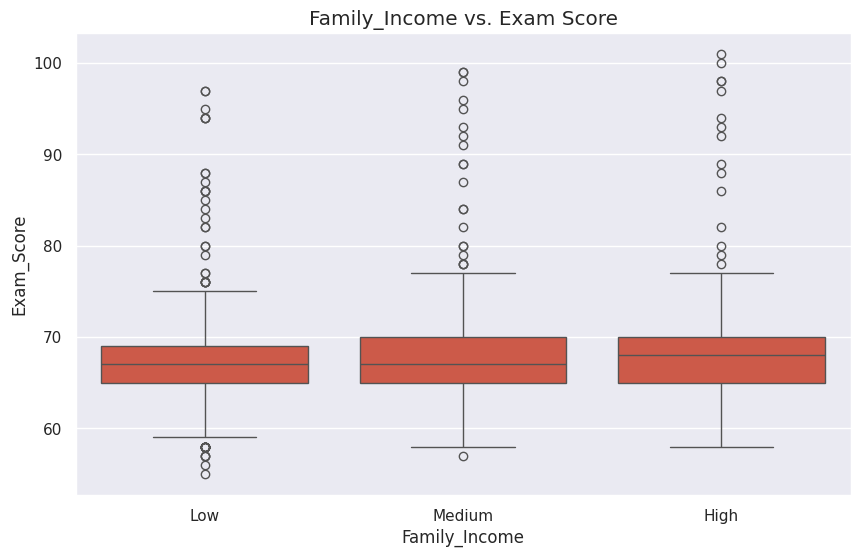

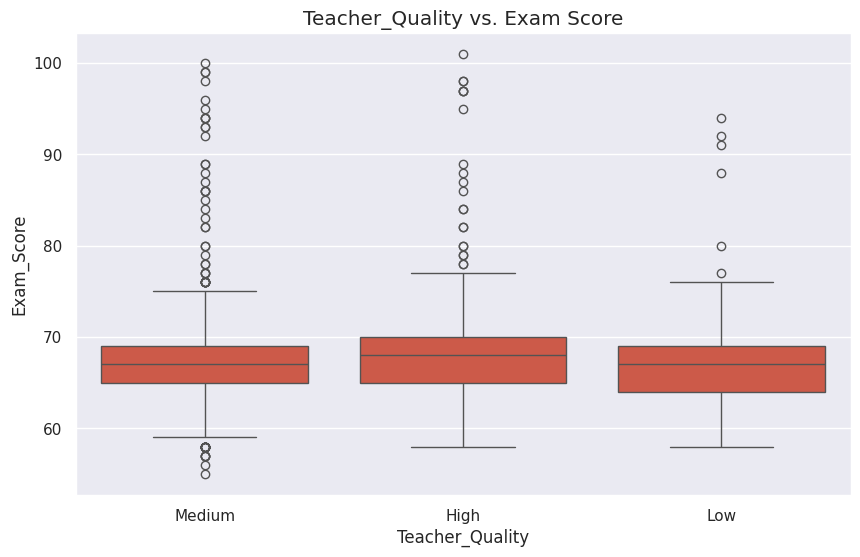

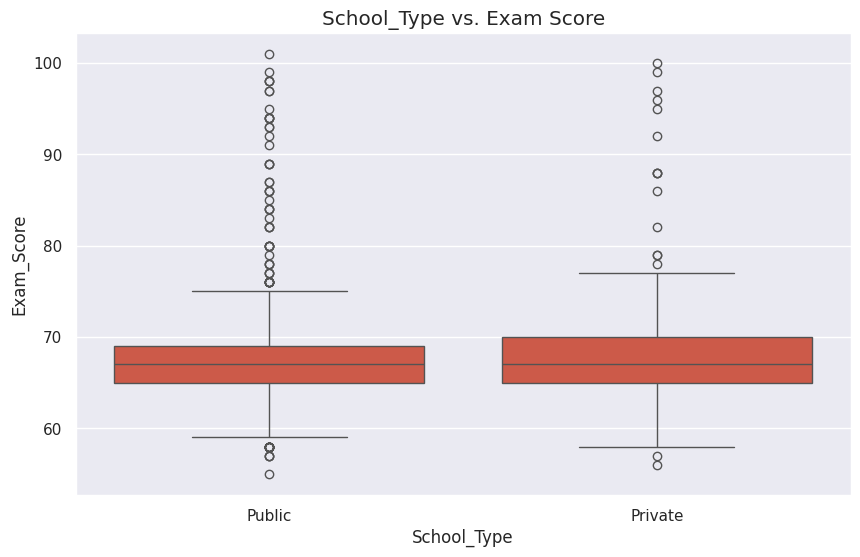

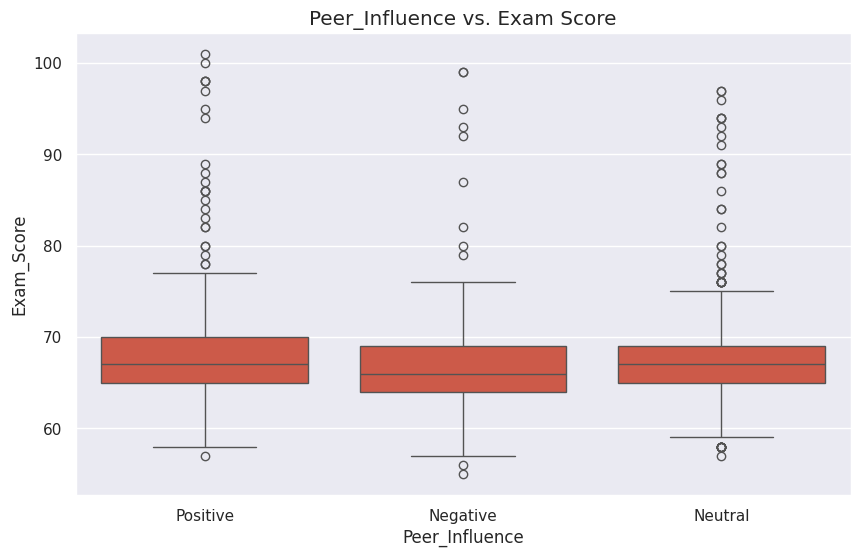

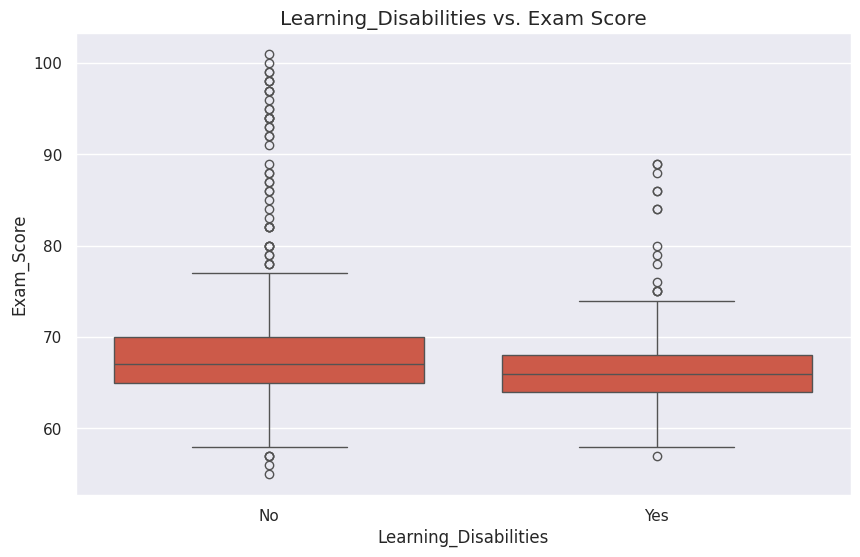

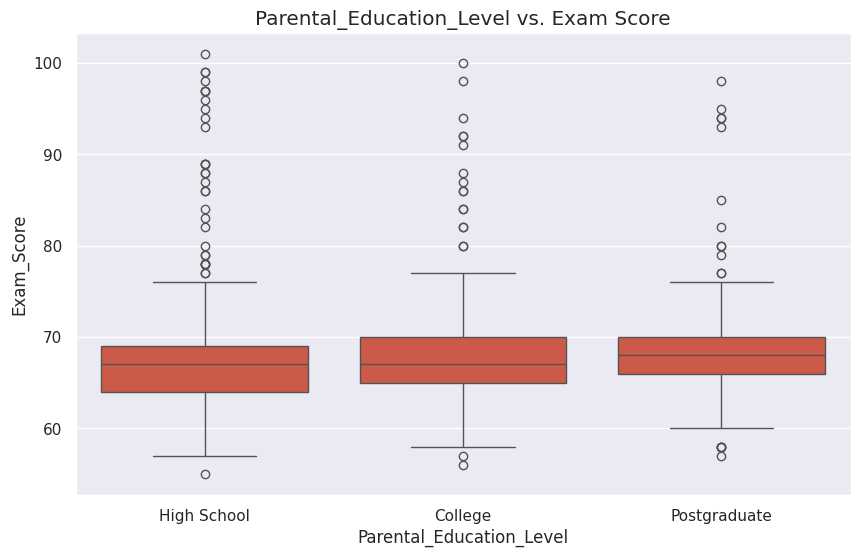

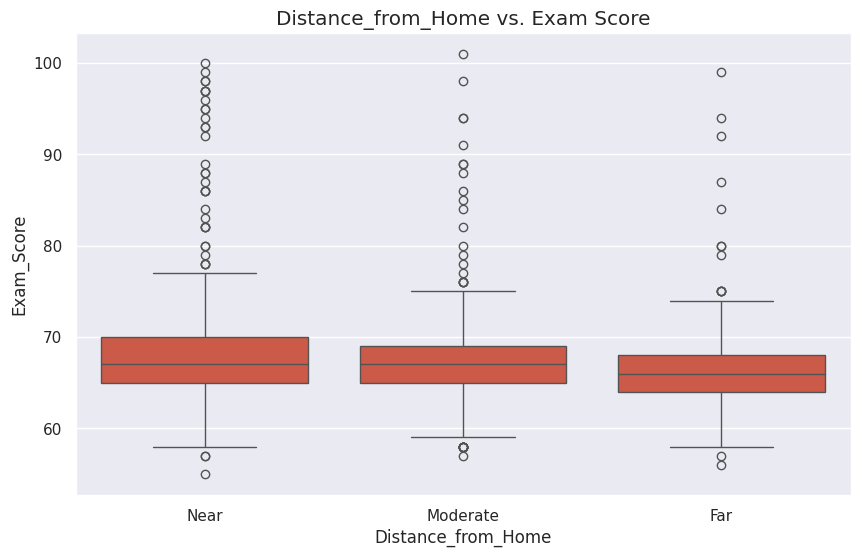

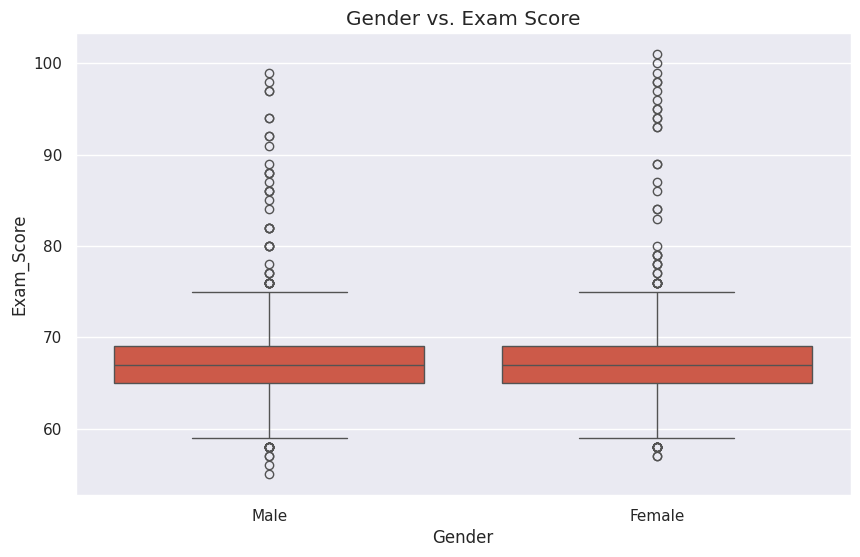

In [16]:
for col in categorical_cols:
    sns.boxplot(data=df, x=col, y='Exam_Score')
    plt.title(f'{col} vs. Exam Score')
    plt.show()

In [17]:
report = sv.analyze(df)
report.show_html('EDA_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
for col in categorical_cols:
    df.fillna({col: df[col].mode()[0]}, inplace=True)

for col in numerical_cols:
    df.fillna({col: df[col].median()}, inplace=True)

In [19]:
from scipy.stats import zscore
z_scores = df[numerical_cols].apply(zscore)
df = df[(z_scores < 3).all(axis=1)]

In [20]:
df.shape

(6565, 20)

In [21]:
parental_involvement_order = ['Low', 'Medium', 'High']
df['Parental_Involvement'] = OrdinalEncoder(categories=[parental_involvement_order]).fit_transform(df[['Parental_Involvement']])

resources_order = ['Low', 'Medium', 'High']
df['Access_to_Resources'] = OrdinalEncoder(categories=[resources_order]).fit_transform(df[['Access_to_Resources']])

df['Extracurricular_Activities'] = LabelEncoder().fit_transform(df['Extracurricular_Activities'])

motivation_order = ['Low', 'Medium', 'High']
df['Motivation_Level'] = OrdinalEncoder(categories=[motivation_order]).fit_transform(df[['Motivation_Level']])

df['Internet_Access'] = LabelEncoder().fit_transform(df['Internet_Access'])

income_order = ['Low', 'Medium', 'High']
df['Family_Income'] = OrdinalEncoder(categories=[income_order]).fit_transform(df[['Family_Income']])

teacher_quality_order = ['Low', 'Medium', 'High']
df['Teacher_Quality'] = OrdinalEncoder(categories=[teacher_quality_order]).fit_transform(df[['Teacher_Quality']])

df['School_Type'] = LabelEncoder().fit_transform(df['School_Type'])

peer_influence_order = ['Negative', 'Neutral', 'Positive']
df['Peer_Influence'] = OrdinalEncoder(categories=[peer_influence_order]).fit_transform(df[['Peer_Influence']])

df['Learning_Disabilities'] = LabelEncoder().fit_transform(df['Learning_Disabilities'])

education_level_order = ['High School', 'College', 'Postgraduate']
df['Parental_Education_Level'] = OrdinalEncoder(categories=[education_level_order]).fit_transform(df[['Parental_Education_Level']])

distance_order = ['Near', 'Moderate', 'Far']
df['Distance_from_Home'] = OrdinalEncoder(categories=[distance_order]).fit_transform(df[['Distance_from_Home']])

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.00,2.00,0,7,73,0.00,1,0,0.00,1.00,1,2.00,3,0,0.00,0.00,1,67
1,19,64,0.00,1.00,0,8,59,0.00,1,2,1.00,1.00,1,0.00,4,0,1.00,1.00,0,61
2,24,98,1.00,1.00,1,7,91,1.00,1,2,1.00,1.00,1,1.00,4,0,2.00,0.00,1,74
3,29,89,0.00,1.00,1,8,98,1.00,1,1,1.00,1.00,1,0.00,4,0,0.00,1.00,1,71
4,19,92,1.00,1.00,1,6,65,1.00,1,3,1.00,2.00,1,1.00,4,0,1.00,0.00,0,70


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [23]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.61,0.60,0.00,2.00,0,0.50,0.46,0.00,1,0.00,0.00,1.00,1,2.00,0.50,0,0.00,0.00,1,67
1,0.50,0.10,0.00,1.00,0,0.67,0.18,0.00,1,0.40,1.00,1.00,1,0.00,0.67,0,1.00,1.00,0,61
2,0.64,0.95,1.00,1.00,1,0.50,0.82,1.00,1,0.40,1.00,1.00,1,1.00,0.67,0,2.00,0.00,1,74
3,0.78,0.73,0.00,1.00,1,0.67,0.96,1.00,1,0.20,1.00,1.00,1,0.00,0.67,0,0.00,1.00,1,71
4,0.50,0.80,1.00,1.00,1,0.33,0.30,1.00,1,0.60,1.00,2.00,1,1.00,0.67,0,1.00,0.00,0,70


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x79c7d9d628c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


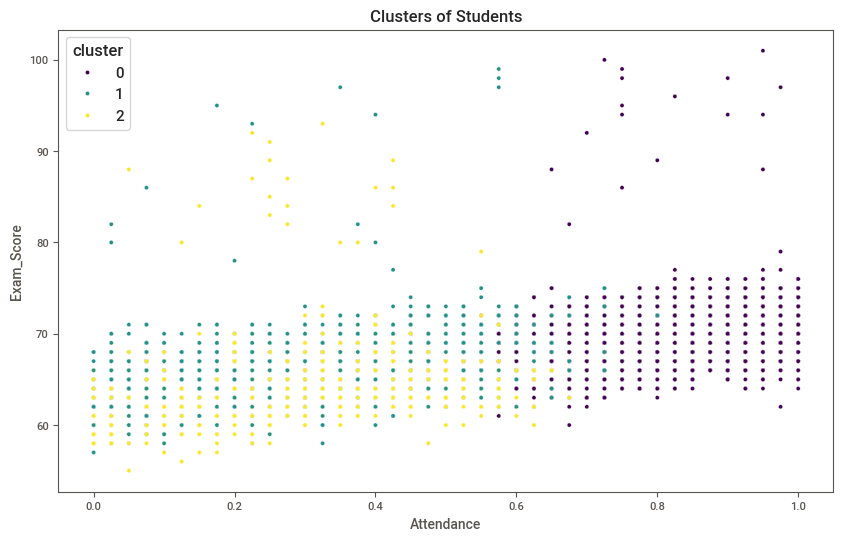

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_cols])

sns.scatterplot(x='Attendance', y='Exam_Score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.show()

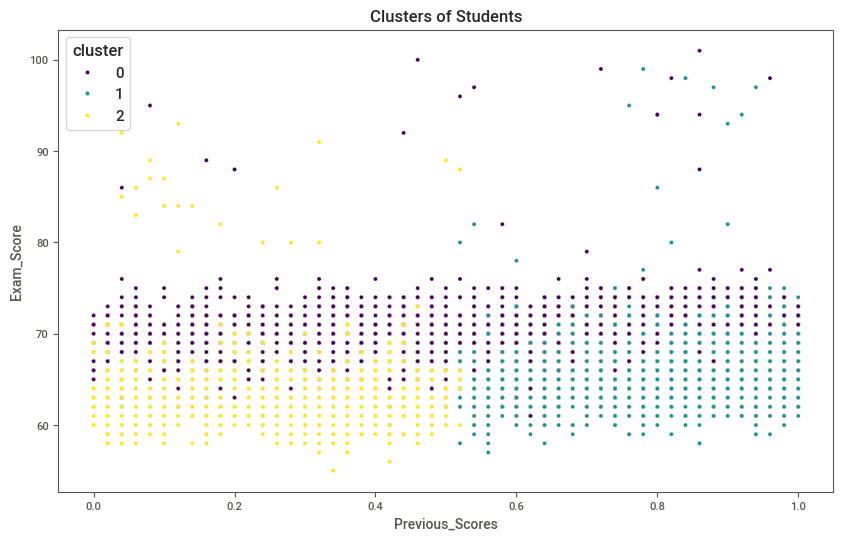

In [25]:
sns.scatterplot(x='Previous_Scores', y='Exam_Score', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Students')
plt.show()

In [26]:
isolation_forest = IsolationForest(random_state=42)
df['anomaly'] = isolation_forest.fit_predict(df[numerical_cols])
df = df[df['anomaly'] == 1]

In [27]:
df.shape

(4200, 22)

In [28]:
model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

df = df[selected_features]

Selected Features: Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Family_Income', 'Physical_Activity',
       'Parental_Education_Level'],
      dtype='object')


In [29]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Family_Income,Physical_Activity,Parental_Education_Level
0,0.61,0.60,0.00,2.00,0.50,0.46,0.00,0.00,0.50,0.00
1,0.50,0.10,0.00,1.00,0.67,0.18,0.40,1.00,0.67,1.00
2,0.64,0.95,1.00,1.00,0.50,0.82,0.40,1.00,0.67,2.00
4,0.50,0.80,1.00,1.00,0.33,0.30,0.60,1.00,0.67,1.00
5,0.50,0.70,1.00,1.00,0.67,0.78,0.60,1.00,0.50,2.00


In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
train_data = X_train.copy()
train_data['Exam_Score'] = y_train

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (3360, 11)
    Training Set Memory Usage = 0.31 MB
Test Set Shape = (840, 10)
    Test Set Memory Usage = 0.07 MB
Single_Label Target: ['Exam_Score']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Bo

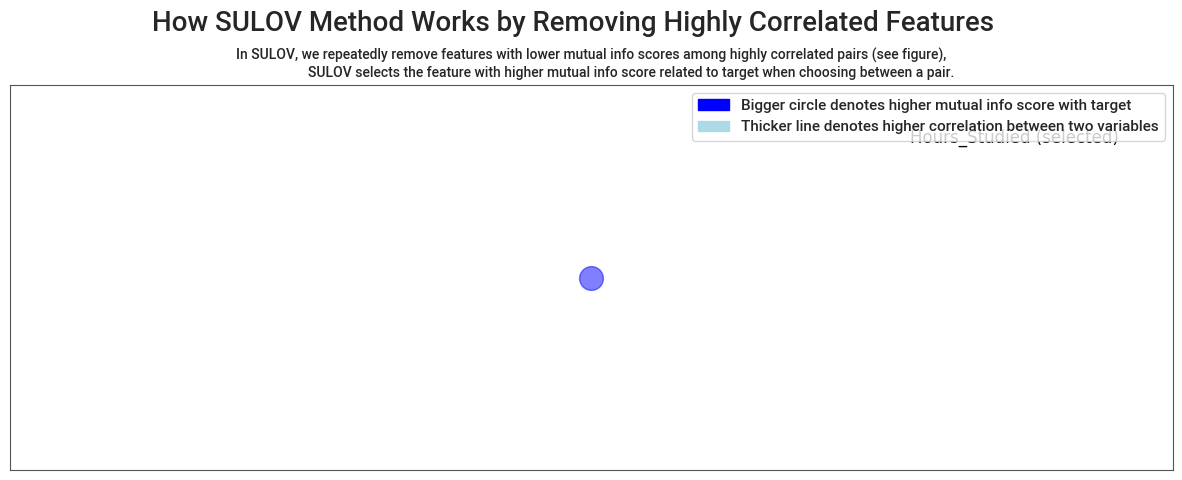

Splitting selected features into float and categorical (integer) variables:
    (10) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 10 
    Finding Important Features using Boosted Trees algorithm...
        using 10 variables...
        using 8 variables...
        using 6 variables...
        using 4 variables...
        using 2 variables...
Found 10 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  2688 , CV rows =  672
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of 

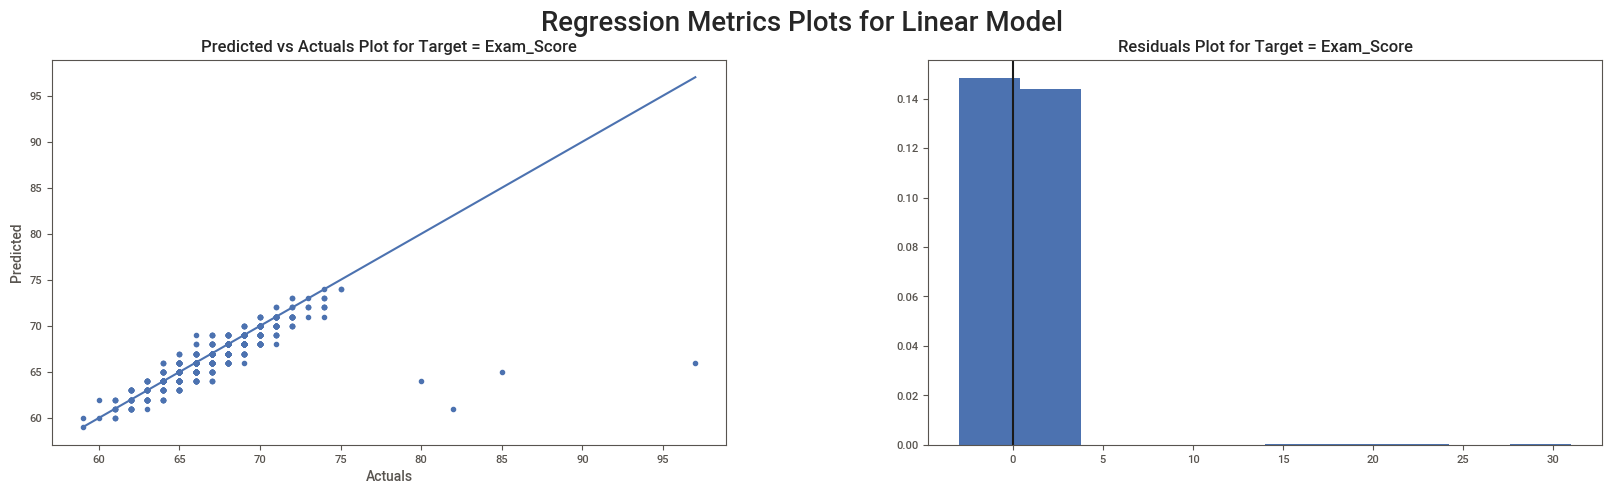

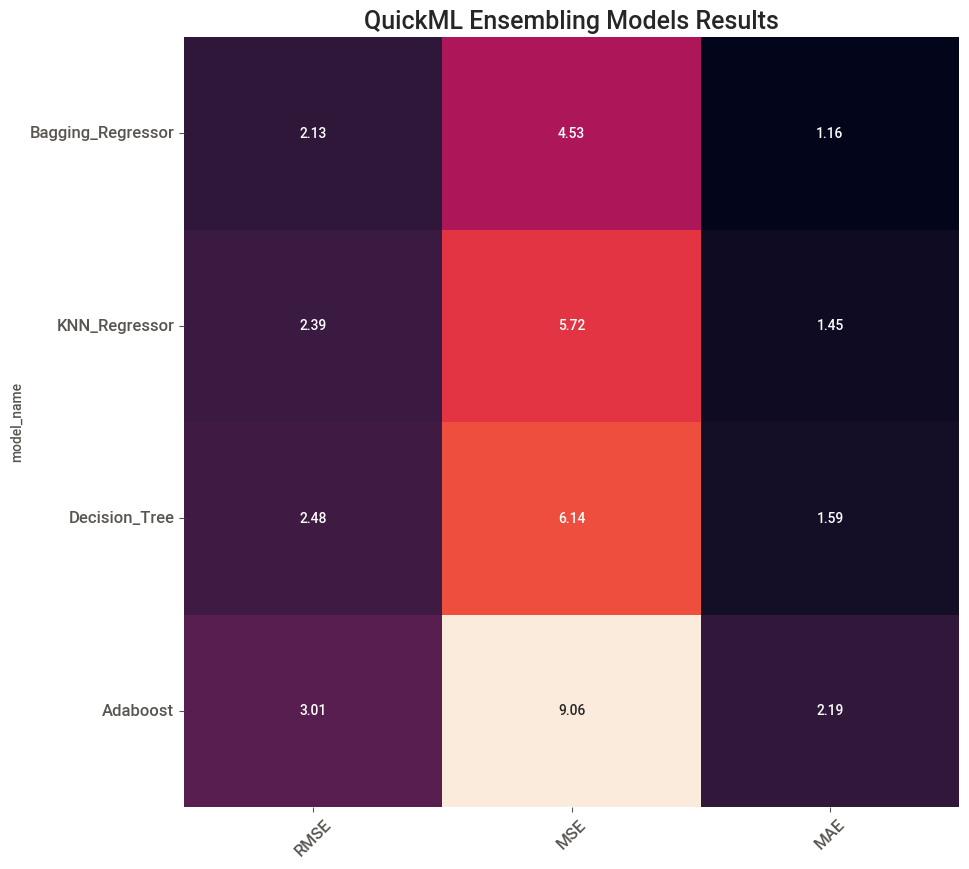

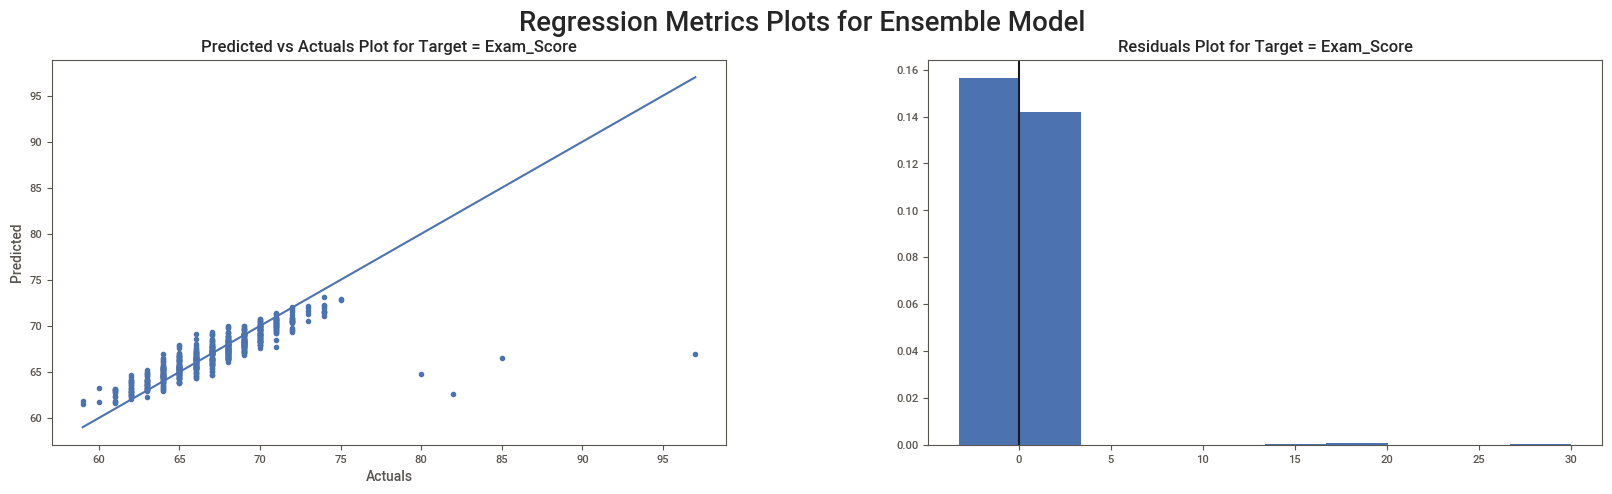

<Figure size 1500x500 with 0 Axes>

In [32]:
model, features, trainm, testm = Auto_ViML(
    train=train_data,
    test=X_test,
    target='Exam_Score',
    verbose=1
)

In [41]:
X_test = X_test[features]
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 15.04614717329916
R2 Score: -0.04826363319663174
